In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset Zoo.csv
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [6]:
# Check missing values per column
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [25]:
df['type'].value_counts() # type = animal class (target)

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [23]:
df.drop(columns=['animal name'], inplace=True) # `animal name` is just an identifier

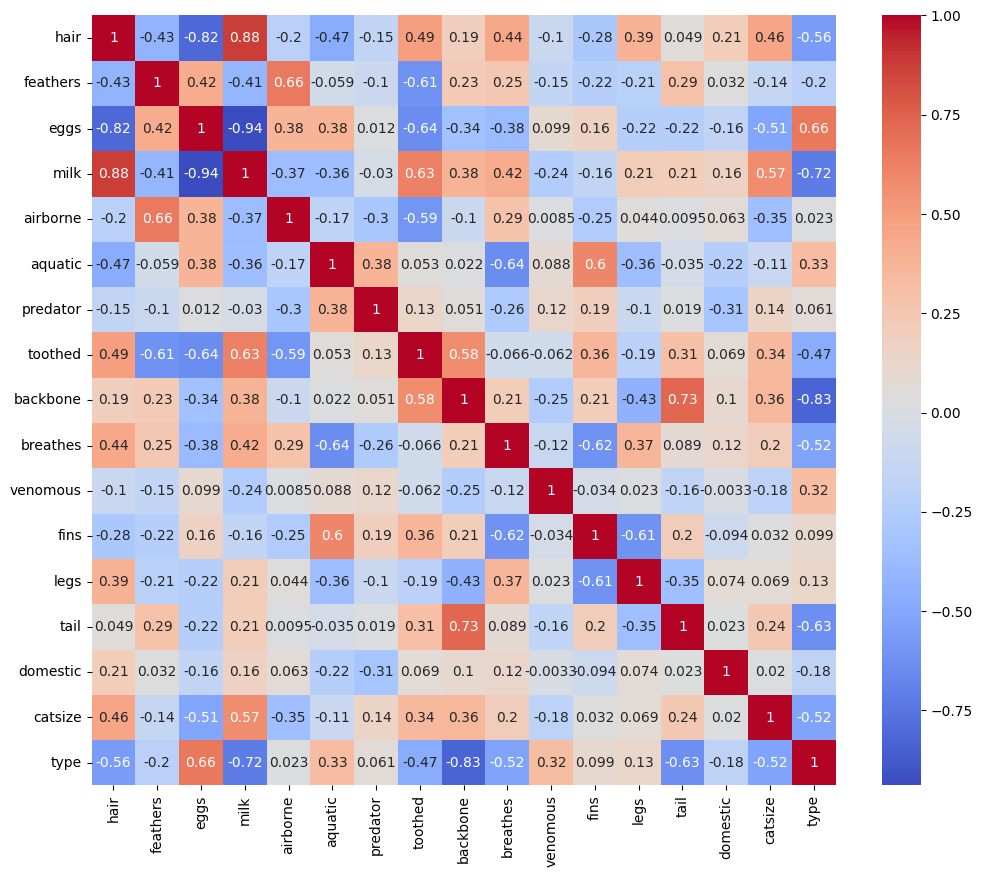

In [24]:
# Heatmap: visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

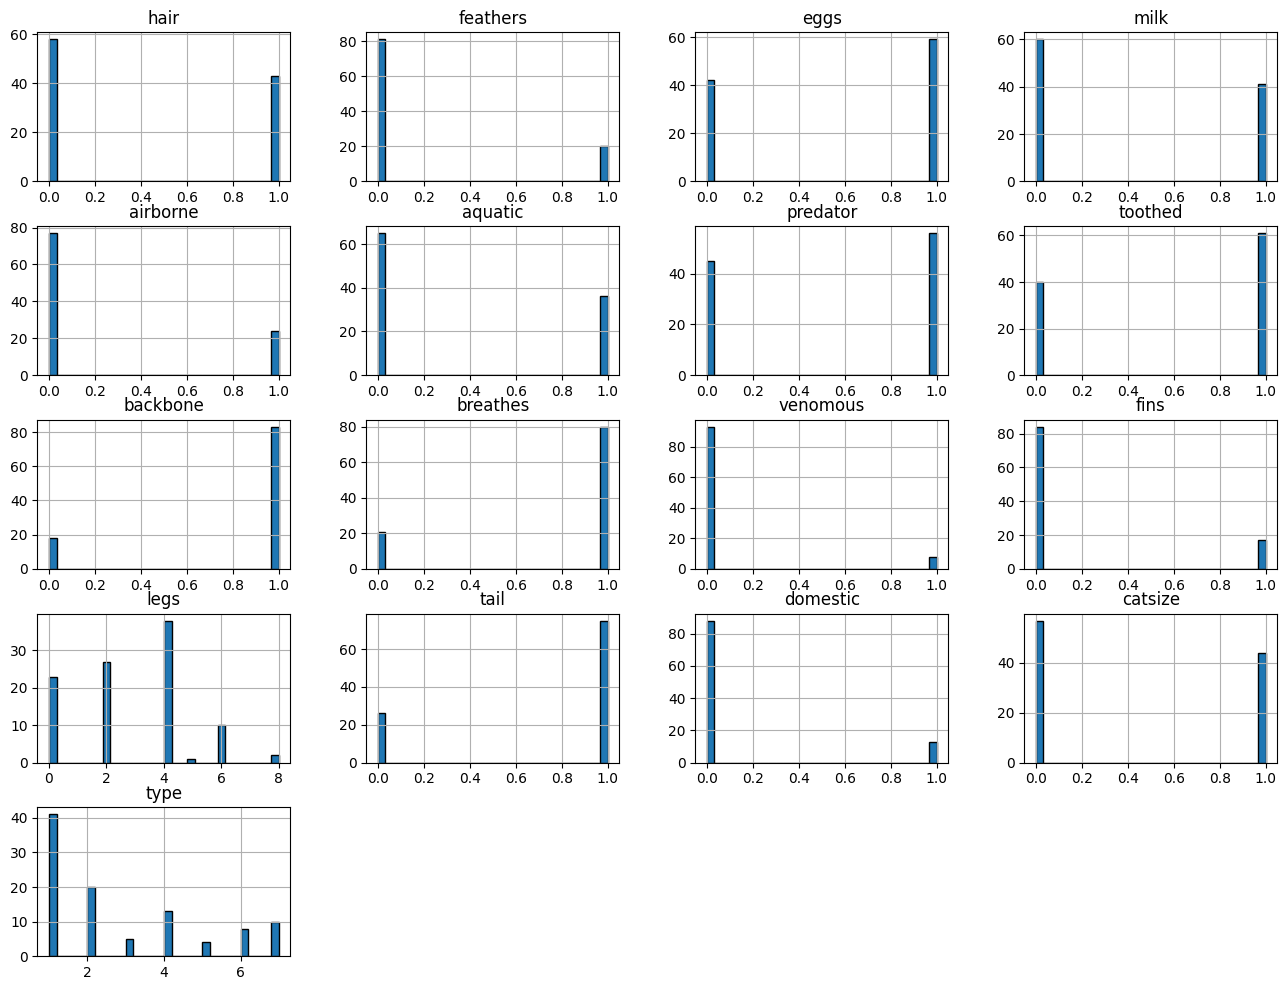

In [19]:
# Histogram plot for numerical columns
df.hist(bins=30, figsize=(16,12),edgecolor="black")
plt.show()

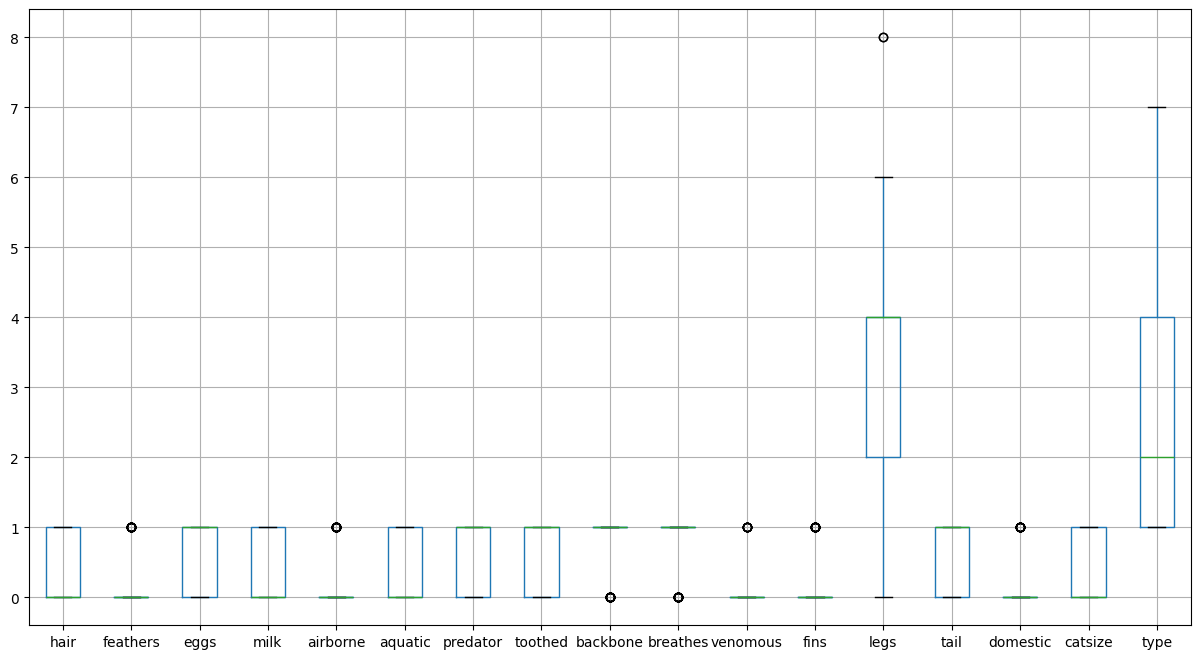

In [37]:
# outliers detection
df.boxplot(figsize=(15,8))
plt.show()

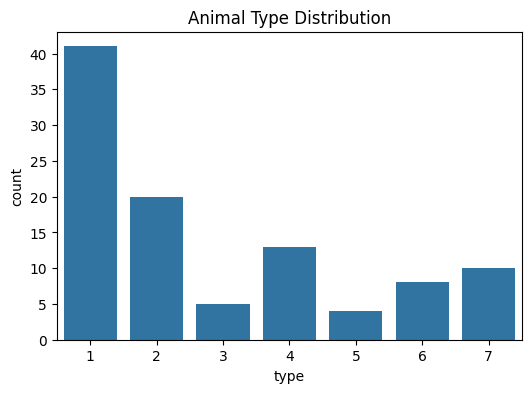

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Animal Type Distribution")
plt.show()

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier # knn implementation

In [49]:
X = df.drop(columns=['type'])
y = df['type'] # target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled

array([[-0.83793058, -0.5       ,  0.85972695, ..., -1.67616342,
        -0.37796447, -0.8819171 ],
       [-0.83793058, -0.5       ,  0.85972695, ...,  0.59660054,
        -0.37796447,  1.13389342],
       [-0.83793058,  2.        ,  0.85972695, ...,  0.59660054,
        -0.37796447, -0.8819171 ],
       ...,
       [-0.83793058,  2.        ,  0.85972695, ...,  0.59660054,
        -0.37796447,  1.13389342],
       [ 1.19341628, -0.5       , -1.16316   , ..., -1.67616342,
        -0.37796447,  1.13389342],
       [ 1.19341628, -0.5       , -1.16316   , ...,  0.59660054,
        -0.37796447, -0.8819171 ]])

In [55]:
X_test_scaled

array([[-0.83793058, -0.5       ,  0.85972695, -0.83793058, -0.53881591,
         1.36277029, -1.16316   ,  0.81649658,  0.46056619,  0.5       ,
        -0.33333333, -0.46056619,  0.63374284, -1.67616342, -0.37796447,
        -0.8819171 ],
       [-0.83793058,  2.        ,  0.85972695, -0.83793058,  1.85592145,
        -0.73379939, -1.16316   , -1.22474487,  0.46056619,  0.5       ,
        -0.33333333, -0.46056619, -0.37020621,  0.59660054, -0.37796447,
        -0.8819171 ],
       [-0.83793058, -0.5       ,  0.85972695, -0.83793058, -0.53881591,
         1.36277029,  0.85972695,  0.81649658,  0.46056619, -2.        ,
        -0.33333333,  2.17124059, -1.37415526,  0.59660054, -0.37796447,
        -0.8819171 ],
       [-0.83793058,  2.        ,  0.85972695, -0.83793058,  1.85592145,
         1.36277029, -1.16316   , -1.22474487,  0.46056619,  0.5       ,
        -0.33333333, -0.46056619, -0.37020621,  0.59660054, -0.37796447,
         1.13389342],
       [ 1.19341628, -0.5       , -1

In [76]:
knn = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [66]:
#y_pred= knn.predict(X_test)
#y_pred

array([1, 2, 4, 2, 1, 1, 1, 1, 1, 4, 6, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2])

In [78]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 3, 6, 1, 1, 2])

In [79]:
accuracy_score(y_test,y_pred)

1.0

Earlier, I initially selected n_neighbors = 15, which produced an accuracy score of 0.9538; however, after validating the hyperparameter using GridSearchCV, the optimal value was found to be n_neighbors = 1, and updating the model accordingly resulted in a perfect accuracy score of 1.0, confirming that K = 1 is the best choice for this dataset.

In [72]:
params= dict(n_neighbors=range(1,100))

In [73]:
grid_search=GridSearchCV(knn,params)

In [74]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=15),
             param_grid={'n_neighbors': range(1, 100)})

In [75]:
grid_search.best_params_

{'n_neighbors': 1}

Metrics

In [80]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0


In [81]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [86]:
'''error_rate = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))'''


'error_rate = []\n\nfor k in range(1, 21):\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train_scaled, y_train)\n    pred_k = knn.predict(X_test_scaled)\n    error_rate.append(np.mean(pred_k != y_test))'

In [87]:
'''plt.figure(figsize=(8,4))
plt.plot(range(1,21), error_rate, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.show()'''

'plt.figure(figsize=(8,4))\nplt.plot(range(1,21), error_rate, marker=\'o\')\nplt.xlabel("K Value")\nplt.ylabel("Error Rate")\nplt.title("Error Rate vs K")\nplt.show()'

The decision boundaries of the classifier.